<h1>Interest zone detection using text regions detection functions by OpenCV</h1>

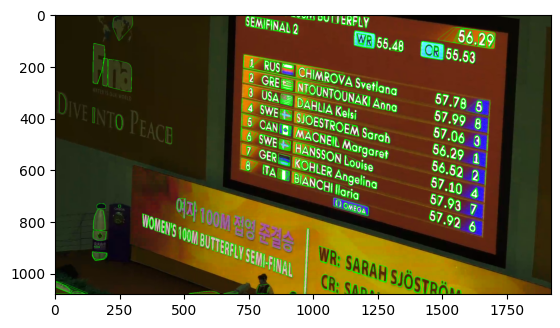

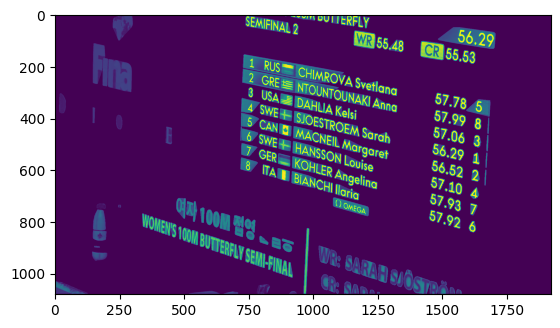

True

In [2]:
# Import packages 
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '../data/natation/000002.png'

#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
ref_img = cv2.imread(img_path)
backup_img = ref_img.copy()

#detect regions in gray scale image
regions, _ = mser.detectRegions(img)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(ref_img, hulls, 1, (0, 255, 0))

plt.imshow(ref_img)
plt.show()

mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(text_only)

plt.show()

In [3]:
len(regions)

8994

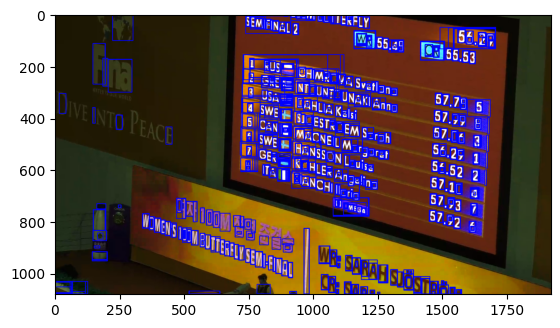

In [4]:
import cv2
import numpy as np

# Load an image
img = cv2.imread(img_path)

#Create MSER object
mser = cv2.MSER_create()

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use the text module to detect regions
regions, _ = mser.detectRegions(gray)

# Draw rectangles around the regions
rectangles = []

for region in regions:
    x, y, w, h = cv2.boundingRect(region)
    rectangles.append([x, y, x + w, y + h])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the image with the rectangles
plt.imshow(img)
plt.show()

<h2>Min-max Suppression</h2>

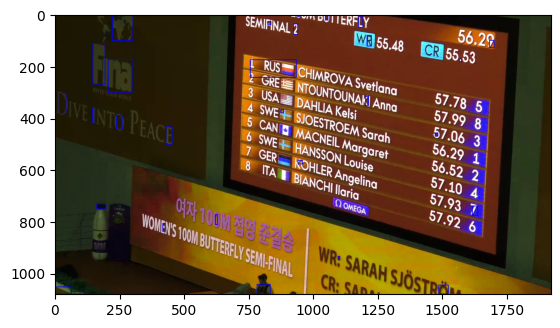

In [5]:
# Reset img
img = backup_img.copy()

confidences = [1 for x in rectangles]

# Convert the list of bounding boxes to a numpy array
boxes = np.array(rectangles, dtype="float32")

# Perform non-maximum suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

# Draw rectangles around the regions after suppression
for i in indices:
    x1, y1, x2, y2 = boxes[i]
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

# Display the image with the rectangles
plt.imshow(img)
plt.show()


In [19]:
indices

array([   0,    2,    3,    4,    7,    8,    9,   12,   17,   20,  106,
        293,  525, 2103, 2106, 2123])

In [20]:
len(indices)

16

In [15]:
len(rectangles)

8986

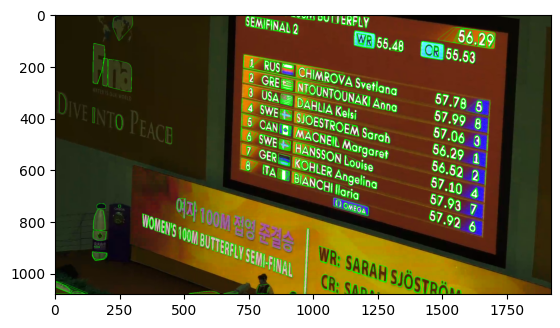

In [6]:
plt.imshow(ref_img)
plt.show()


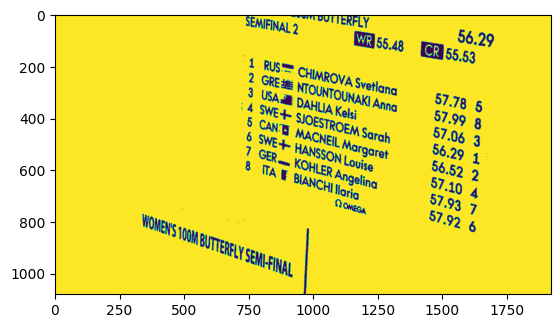

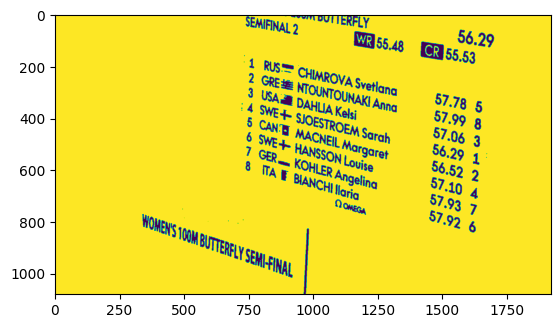

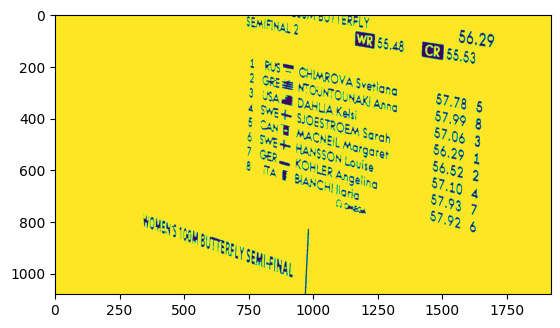

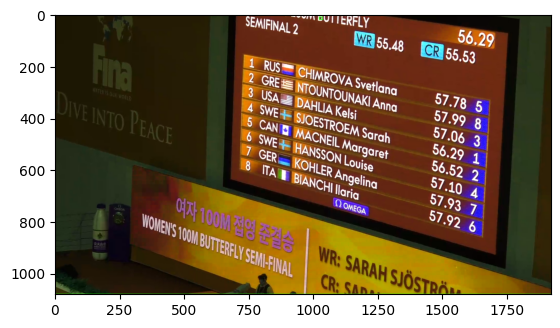

In [8]:
img = backup_img.copy()
gray = cv2.cvtColor(backup_img, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 3)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,2))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
dilate = cv2.dilate(opening, dilate_kernel, iterations=4)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 2)

plt.imshow(thresh)
plt.show()
plt.imshow(opening)
plt.show()
plt.imshow(dilate)
plt.show()
plt.imshow(img)
plt.show()

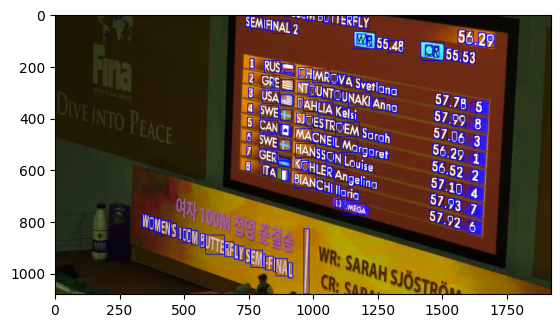

In [11]:
img = backup_img.copy()
gray = cv2.cvtColor(backup_img, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 3)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,2))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Use the text module to detect regions
regions, _ = mser.detectRegions(opening)

# Draw rectangles around the regions
rectangles = []

for region in regions:
    x, y, w, h = cv2.boundingRect(region)
    rectangles.append([x, y, x + w, y + h])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the image with the rectangles
cv2.imwrite("test.png", img)
plt.imshow(img)
plt.show()


Peut être utilisé pour enlever des sponsors dans l'ombre

Transformons cela en une fonction : 

In [10]:
def get_boxes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 3)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,2))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

    # Use the text module to detect regions
    regions, _ = mser.detectRegions(opening)

    # Draw rectangles around the regions
    rectangles = []

    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        rectangles.append([x, y, x + w, y + h])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the image with the rectangles
    cv2.imwrite("test_{}.png".format(img_path.split(".")[-2].split("/")[-1]), img)

    return rectangles

In [75]:
for i in range(15):
    img_path_i = '../data/natation/0000{}.png'.format(i if i >= 10 else "0" + str(i))
    get_boxes(img_path_i)

In [105]:
def get_text_boxes(img_path):
    # Load an image
    img = cv2.imread(img_path)

    #Create MSER object
    mser = cv2.MSER_create()

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    # Use the text module to detect regions
    regions, _ = mser.detectRegions(gray)

    # Draw rectangles around the regions
    rectangles = []

    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        rectangles.append([x, y, x + w, y + h])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the image with the rectangles
    cv2.imwrite("test_{}.png".format(img_path.split(".")[-2].split("/")[-1]), img)

    return rectangles

In [106]:
for i in range(15):
    img_path_i = '../data/natation/0000{}.png'.format(i if i >= 10 else "0" + str(i))
    get_text_boxes(img_path_i)

In [91]:
def get_cleaned_text_boxes(img_path):
    # Load an image
    img = cv2.imread(img_path)

    #Create MSER object
    mser = cv2.MSER_create()

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Use the text module to detect regions
    regions, _ = mser.detectRegions(gray)

    # Draw rectangles around the regions
    rectangles = []
    surfaces = []

    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        rectangles.append([x, y, x + w, y + h])
        surfaces.append(w * h)
    
    s_median = np.median(np.array(surfaces))
    
    cleaned_rects = []
    for i in range(len(rectangles)):
        if surfaces[i] >= 0.1 * s_median and surfaces[i] <= 6*s_median:
            rect = rectangles[i]
            cv2.rectangle(img, (rect[0], rect[1]), (rect[2], rect[3]), (0, 0, 255), 2)
            cleaned_rects.append(rect)

    # Display the image with the rectangles
    cv2.imwrite("test_{}_clean.png".format(img_path.split(".")[-2].split("/")[-1]), img)

    return cleaned_rects

In [92]:
for i in range(15):
    img_path_i = '../data/natation/0000{}.png'.format(i if i >= 10 else "0" + str(i))
    get_cleaned_text_boxes(img_path_i)

In [112]:
def dist_rectangles(r1, r2):
    left = r2[2] < r1[0]
    right = r1[2] < r2[0]
    bottom = r2[3] < r1[1]
    top = r1[3] < r2[1]
    if top and left:
        dist = np.linalg.norm([r1[0] - r2[2], r1[3] - r2[1]])
    elif left and bottom:
        dist = np.linalg.norm([r1[0] - r2[2], r1[1] - r2[3]])
    elif bottom and right:
        dist = np.linalg.norm([r1[2] - r2[0], r1[1]- r2[3]])
    elif right and top:
        dist = np.linalg.norm([r1[2] - r2[0], r1[3] - r2[1]])
    elif left or right:
        dist = abs(r1[0] - r2[2])
    elif bottom or top:
        dist = abs(r1[1] - r2[3])
    else: # rectangles intersect
        return 0.
    w = r2[2] - r2[0] + r1[2] - r1[0]
    h = r2[3] - r2[1] + r1[3] - r1[1]
    return dist / (w + h)

In [122]:
def merge_two_rectangles(r1, r2):
    x1 = min(r1[0], r2[0])
    y1 = min(r1[1], r2[1])
    x2 = max(r1[2], r2[2])
    y2 = max(r1[3], r2[3])
    return [x1, y1, x2, y2]

In [129]:
def merge_rectangles(rectangles):
    if len(rectangles) == 1:
        return rectangles
    elif len(rectangles) > 1:
        new_rect = merge_two_rectangles(rectangles[0], rectangles[1])
        rectangles.pop(0)
        rectangles.pop(0)
        return merge_rectangles([new_rect] + rectangles)
    return []

In [130]:
def merge_boxes_with_dists(rectangles, threshold=0.2):
    l = len(rectangles)
    dists = np.zeros((l, l))
    groups = np.zeros(l)

    for i in range(1, l):
        for j in range(i-1):
            dists[i][j] = dist_rectangles(rectangles[i], rectangles[j])
            if dists[i][j] <= threshold:
                # Group
                if not (groups[i] or groups[j]):
                    group = max(groups) + 1
                    groups[i], groups[j] = group, group
                elif groups[i] == groups[j]:
                    pass
                elif groups[i] * groups[j] == 0:
                    index = np.argmax([groups[i], groups[j]])
                    group = max([groups[i], groups[j]])
                    groups[i], groups[j] = group, group
                else:
                    min_group = min([groups[i], groups[j]])
                    max_group = max([groups[i], groups[j]])
                    for k in range(l):
                        groups[k] = min_group if groups[k] == max_group else groups[k]
    
    max_group = max(groups)
    grouped_rectangles = []
    for group in range(1, int(max_group) + 1):
        rect_indexes = [i for i in range(len(groups)) if groups[i] == group]
        group_rects = [rectangles[i] for i in rect_indexes]
        grouped_rectangles += merge_rectangles(group_rects)
    
    return grouped_rectangles

In [126]:
def get_cleaned_text_boxes_2(img_path):
    # Load an image
    img = cv2.imread(img_path)

    #Create MSER object
    mser = cv2.MSER_create()

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Use the text module to detect regions
    regions, _ = mser.detectRegions(gray)

    # Draw rectangles around the regions
    rectangles = []
    surfaces = []

    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        rectangles.append([x, y, x + w, y + h])
        surfaces.append(w * h)
    
    s_median = np.median(np.array(surfaces))
    
    cleaned_rects = []
    for i in range(len(rectangles)):
        if surfaces[i] >= 0.1 * s_median and surfaces[i] <= 6*s_median:
            rect = rectangles[i]
            #cv2.rectangle(img, (rect[0], rect[1]), (rect[2], rect[3]), (0, 0, 255), 2)
            cleaned_rects.append(rect)
    
    cleaned_rects = merge_boxes_with_dists(cleaned_rects)
            
    for rect in cleaned_rects:
        cv2.rectangle(img, (rect[0], rect[1]), (rect[2], rect[3]), (0, 0, 255), 2)

    # Display the image with the rectangles
    cv2.imwrite("test_{}_clean_2.png".format(img_path.split(".")[-2].split("/")[-1]), img)

    return cleaned_rects

In [132]:
for i in range(15):
    img_path_i = '../data/natation/0000{}.png'.format(i if i >= 10 else "0" + str(i))
    get_cleaned_text_boxes_2(img_path_i)

: 

: 

In [131]:
img_path_i = '../data/natation/000000.png'
get_cleaned_text_boxes_2(img_path_i)

[[7, 62, 156, 113],
 [704, 27, 925, 573],
 [217, 43, 649, 531],
 [692, 346, 712, 476],
 [684, 102, 701, 139],
 [388, 501, 460, 529],
 [691, 251, 708, 335],
 [685, 155, 704, 239],
 [618, 396, 653, 425],
 [429, 49, 454, 74],
 [212, 7, 237, 17],
 [505, 512, 648, 548],
 [690, 534, 702, 549],
 [1080, 679, 1143, 719],
 [320, 711, 351, 719]]